# Curve fitting for velocity profile in open channel

by Xiaofeng Liu, Ph.D., P.E.  
Associate Professor

Department of Civil and Environmental Engineering  
Institute of Computational and Data Sciences  
Penn State University  
223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

# Flow velocity profile

Open channels are bounded by river bed (solid) on side and air on top. On bed, flow velocity is zero due to viscosity. In general, flow velocity increases from zero on bed to its maximun near the free surface. The distribution of flow velocity (profile) is of great importancce in several aspects. For example, the integration of flow velocity distribution across a section will give the flow discharge (amount of water move through this section per unit time). The specific velocity distribution also affects the shear stress on the bed, which can cause erosion. 

From fluid dynamics, there are generally three layers in a near wall flow, i.e., the viscous sublayer where the effect of viscosity is dominant, the buffer layer (a transition layer), and the log-law layer. In the log-law layer, which occupies the majority of water column, the time-averaged velocity $U(z)$ of a turbulent flow at a certain point is proportional to the logarithm of the distance $z$ from "wall" ([see wikipedia explanation](https://en.wikipedia.org/wiki/Law_of_the_wall)).

Mathematically, the log-law can be written as 
\begin{equation}
   \frac{U}{u_*} = \frac{1}{\kappa}\ln(\frac{z}{k_s/30})
\end{equation}
where $u_*$ is the shear velocity, $k_s$ is the roughness of the wall, and $\kappa$ is a constant equal to 0.41.

<img src="log_law.png" width="300"/>

In experiments or field measurements, it is easy to measure the velocity $U$ and the distance $z$. In other words, the velocity profile is easy to obtain. From such velocity profile, we are often interested in calculating the value of the shear velocity $u_*$ and the roughness of the wall $k_s$. From the shear velocity, we can further calculate things like shear stress as $\tau_b = \rho u_*^2$.

For this problem, the log law (law of the wall) equation can be converted to:
\begin{equation}
   U = \frac{u_*}{\kappa}\ln(z)-\frac{u_*}{\kappa}\ln(\frac{k_s}{30})
\end{equation}
With measured data, we can fit a linear curve in the form of
\begin{equation}
   y = a_0+a_1 x
\end{equation}
where $y = U$, $a_1 = \frac{u_*}{\kappa}$, $a_0 = -\frac{u_*}{\kappa}\ln(\frac{k_s}{30})$ and $x= \ln(z)$

The following Python code first reads in the velocit profile data and then perform the curve fitting. The code will then calculate and report the fitted shear velocity and roughness height. At the end, it plotts the data set and the fitted curve. 

Fitted shear velocity is  0.026  m/s.
Fitted roughness is  0.0064  m.


[]

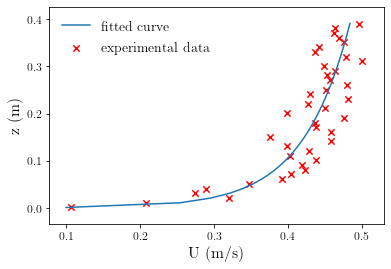

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 


#directly load the data from file and assign the columns to "x" and "y"
z, U = np.loadtxt('velocity_data.txt', unpack=True, skiprows=1)
x = np.log(z)
y= U

a0, a1, r2 = calculate_linear_regression_coef(x, y) 

kappa = 0.41
u_star = a1 * kappa
print("Fitted shear velocity is ", round(u_star,3), " m/s.")


ks = np.exp(a0* kappa/(-u_star))*30
print("Fitted roughness is ", round(ks,4), " m.")


U_pre = u_star/kappa*np.log(z/ks*30)

plt.scatter( U,z, c = "r", marker = "x", s = 40, label='experimental data') 
plt.plot( U_pre,z, label='fitted curve') 

plt.xlabel('U (m/s)',fontsize=16) 
plt.ylabel('z (m)',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.plot()